# Global Space Launches

This dataset contains data about every Space launch from 1957 to the Modern-day.
The attributes are given below:
- Company Name - Name of Organization responsible for launch
- Location - Name of launch location
- Details - Specification of each rocket
- Status Rocket - Showing if a rocket is currently in use
- Rocket - Cost in Millions of rocket used
- Status Mission - One of 4 categorical elements showing the the result of the launch
- Country of Launch - the country where the launch took place
- Company's Country of Origin - the country that the organization is from
- Private or State Run - the organizations category think SpaceX for private and NASA for State
- DateTime - Date and Time
- Year - year of launch
- Month - Month of launch
- Day - Day of launch
- Date - Date of launch
- Time - Time of launch

## Objective
Perform Exploratory Data analysis on the dataset to understand the following:
1. Illustrate with appropriate plot the countries wherein successful launches have takenplace over the years.
2. Which are the major players in the private sector of the space industry?
3. Which organization is the most collaborative and works the most with other countries?Illustrate with plots
4. Analyse at what time of the day do the launches usually fail.
5. Explore with plots the budget allocated to GSLV and PSLV launches from ISRO. Also assess the success rate of launches conducted by ISRO for GSLV and PSLV spaceshipsvia plots through the years.


In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [322]:
df= pd.read_csv('Global Space Launches.csv')

In [323]:
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50


In [324]:
df.columns

Index(['Company Name', 'Location', 'Detail', 'Status Rocket', ' Rocket',
       'Status Mission', 'Country of Launch', 'Companys Country of Origin',
       'Private or State Run', 'DateTime', 'Year', 'Month', 'Day', 'Date',
       'Time'],
      dtype='object')

In [325]:
df.rename(columns= {' Rocket': 'Rocket'}, inplace= True)

In [326]:
df['Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [327]:
df['Rocket']=df['Rocket'].replace('.', '')
df['Rocket']=df['Rocket'].replace(',', '')
df['Rocket']=df['Rocket'].replace({'5,000.0 ':'5000','1,160.0 ':'1160'})
df['Rocket']=df['Rocket'].astype('float64')

In [328]:
df.columns

Index(['Company Name', 'Location', 'Detail', 'Status Rocket', 'Rocket',
       'Status Mission', 'Country of Launch', 'Companys Country of Origin',
       'Private or State Run', 'DateTime', 'Year', 'Month', 'Day', 'Date',
       'Time'],
      dtype='object')

In [329]:
df['Status Mission'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company Name                4324 non-null   object 
 1   Location                    4324 non-null   object 
 2   Detail                      4324 non-null   object 
 3   Status Rocket               4324 non-null   object 
 4   Rocket                      964 non-null    float64
 5   Status Mission              4324 non-null   object 
 6   Country of Launch           4324 non-null   object 
 7   Companys Country of Origin  4324 non-null   object 
 8   Private or State Run        4324 non-null   object 
 9   DateTime                    4324 non-null   object 
 10  Year                        4324 non-null   int64  
 11  Month                       4324 non-null   int64  
 12  Day                         4324 non-null   int64  
 13  Date                        4324 

In [331]:
df.isnull().sum()

Company Name                     0
Location                         0
Detail                           0
Status Rocket                    0
Rocket                        3360
Status Mission                   0
Country of Launch                0
Companys Country of Origin       0
Private or State Run             0
DateTime                         0
Year                             0
Month                            0
Day                              0
Date                             0
Time                             0
dtype: int64

In [278]:
df.isnull().sum()/len(df)

Company Name                  0.000000
Location                      0.000000
Detail                        0.000000
Status Rocket                 0.000000
Rocket                        0.777058
Status Mission                0.000000
Country of Launch             0.000000
Companys Country of Origin    0.000000
Private or State Run          0.000000
DateTime                      0.000000
Year                          0.000000
Month                         0.000000
Day                           0.000000
Date                          0.000000
Time                          0.000000
dtype: float64

Column Rocket has 77.7% of missing values.

### 1. Illustrate with appropriate plot the countries wherein successful launches have takenplace over the years.

In [332]:
df1= df[df['Status Mission']== 'Success']

In [333]:
df2= pd.DataFrame(df1.groupby('Country of Launch')['Status Mission'].count())
df2.head()

,Status Mission
Country of Launch,
Australia,3
China,244
France,285
India,63
Iran,5


<AxesSubplot:title={'center':'Countries wherein successful launches have takenplace over the years'}, xlabel='Country of Launch'>

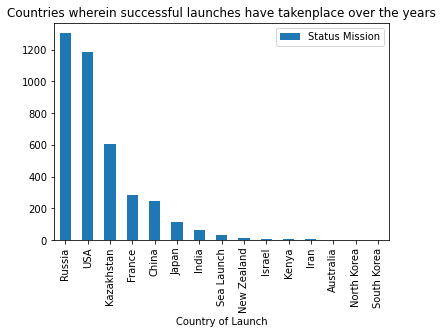

In [334]:
df2.sort_values(by= 'Status Mission', ascending=False).plot(kind='bar', title= 'Countries wherein successful launches have takenplace over the years')

Russia, USA and Kazakhstan are the countries wherein the successful launches have taken place.

### 2. Which are the major players in the private sector of the space industry?

In [335]:
df1= df[df['Private or State Run']=='P']

In [336]:
df2= pd.DataFrame(df1.groupby('Company Name')['Private or State Run'].count())

In [337]:
df2.head()

,Private or State Run
Company Name,
Arianespace,279
Blue Origin,12
Boeing,136
Douglas,1
EER,1


<AxesSubplot:title={'center':'Major players in the private sector of the space industry'}, xlabel='Company Name'>

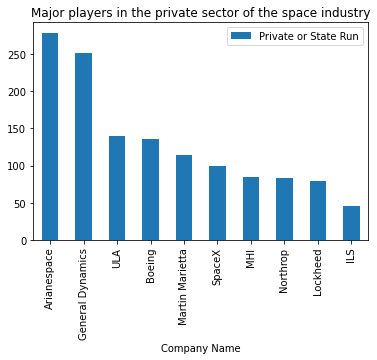

In [338]:
df2.sort_values(by= 'Private or State Run', ascending=False).head(10).plot(kind='bar', title= 'Major players in the private sector of the space industry')

### 3. Which organization is the most collaborative and works the most with other

In [339]:
df1= df[df['Country of Launch']!=df['Companys Country of Origin']]

In [340]:
df2= pd.DataFrame(df1.groupby(['Company Name','Country of Launch']).count())

In [341]:
df2.head()

Location  Detail  Status Rocket  Rocket  \
Company Name  Country of Launch                                            
AMBA          Australia                 1       1              1       0   
ASI           Kenya                     9       9              9       0   
Arianespace   France                  277     277            277      94   
              Kazakhstan                2       2              2       2   
Arme de l'Air France                    4       4              4       0   

                                 Status Mission  Companys Country of Origin  \
Company Name  Country of Launch                                               
AMBA          Australia                       1                           1   
ASI           Kenya                           9                           9   
Arianespace   France                        277                         277   
              Kazakhstan                      2                           2   
Arme de l'Air France                          4                           4   

                                 Private or State Run  DateTime  Year  Month  \
Company Name  Country of Launch                                                
AMBA          Australia                             1         1     1      1   
ASI           Kenya                                 9         9     9      9   
Arianespace   France                              277       277   277    277   
              Kazakhstan                            2         2     2      2   
Arme de l'Air France                                4         4     4      4   

                                 Day  Date  Time  
Company Name  Country of Launch                   
AMBA          Australia            1     1     1  
ASI           Kenya                9     9     9  
Arianespace   France             277   277   277  
              Kazakhstan           2     2     2  
Arme de l'Air France               4     4     4

In [342]:
df3= df2.reset_index()[["Company Name","Country of Launch", 'Location']]
df3.head()                    

,Company Name,Country of Launch,Location
0,AMBA,Australia,1
1,ASI,Kenya,9
2,Arianespace,France,277
3,Arianespace,Kazakhstan,2
4,Arme de l'Air,France,4


In [343]:
df4= df3.sort_values("Location", ascending=False).head()
df4.head()

,Company Name,Country of Launch,Location
16,RVSN USSR,Kazakhstan,579
2,Arianespace,France,277
18,Roscosmos,Kazakhstan,47
22,VKS RF,Kazakhstan,44
20,Sea Launch,Sea Launch,36


<AxesSubplot:xlabel='Company Name', ylabel='Location'>

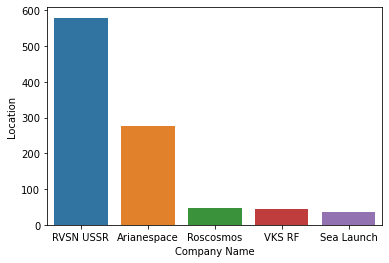

In [344]:
sns.barplot(x='Company Name', y='Location', data=df4)


- RVSN USSR and Arianespace are most collaborative organizations and works the most with other

### 4. Analyse at what time of the day do the launches usually fail.

In [345]:
df['Hour']= df['Time'].apply(lambda x : x.split(':')[0])

In [346]:
df.head(1)

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,Hour
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12,05


In [347]:
df1 = df[df['Status Mission'] != 'Success']

In [348]:
df2=pd.DataFrame(df1.groupby('Hour')['Status Mission'].count())

In [349]:
df2.head()

,Status Mission
Hour,
00,51
01,12
02,11
03,13
04,10


<AxesSubplot:xlabel='Hour', ylabel='Status Mission'>

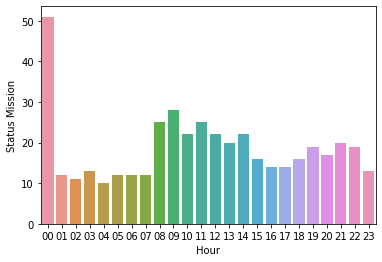

In [350]:
sns.barplot(x=df2.index, y=df2['Status Mission'])

- Most of the launches usually fails at midnight.  

### 5. Explore with plots the budget allocated to GSLV and PSLV launches from ISRO.  
   ### Also assess the success rate of launches conducted by ISRO for GSLV and PSLV spaceshipsvia plots through the years.

In [351]:
df1= df[df['Company Name'] == "ISRO"]

In [352]:
df2= df1[df1['Detail'].apply(lambda x : 'GSLV' in x )]

In [353]:
df3= df1[df1['Detail'].apply(lambda x: 'PSLV' in x )]

In [354]:
df2['vname']= 'GLSV'

C:\Users\SUFI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [355]:
df3['vname']= 'PSLV'

C:\Users\SUFI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [356]:
df4= pd.concat([df2,df3,], axis=0)

In [357]:
df4['budg'] = df4['Rocket']

In [359]:
df4.head(3)

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,Hour,vname,budg
121,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",GSLV Mk III | Chandrayaan-2 lunar mission,StatusActive,62.0,Success,India,India,S,2019-07-22 09:13:00+00:00,2019,7,22,22/07/2019,09:13,09,GLSV,62.0
179,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",GSLV Mk II | GSAT-7A,StatusActive,47.0,Success,India,India,S,2018-12-19 10:40:00+00:00,2018,12,19,19/12/2018,10:40,10,GLSV,47.0
195,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",GSLV Mk III | GSAT 29,StatusActive,62.0,Success,India,India,S,2018-11-14 11:38:00+00:00,2018,11,14,14/11/2018,11:38,11,GLSV,62.0


In [360]:
df5= df4.groupby('vname').sum()
df5

,Rocket,Year,Month,Day,budg
vname,,,,,
GLSV,859.0,34207,124,250,859.0
PSLV,1318.0,102580,328,935,1318.0


<AxesSubplot:xlabel='vname', ylabel='budg'>

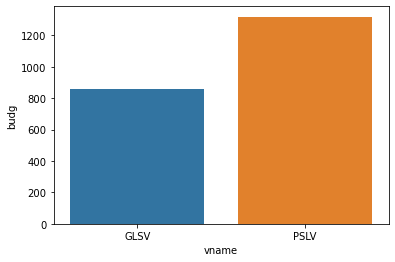

In [361]:
sns.barplot(x= df5.index, y= df5.budg)

- More budget is allocated to PSLV than GSLV by ISRO.

In [362]:
df6= df4[['vname','Year','Company Name','Status Rocket', 'Rocket','Status Mission']]

In [363]:
df6.head(2)

,vname,Year,Company Name,Status Rocket,Rocket,Status Mission
121,GLSV,2019,ISRO,StatusActive,62.0,Success
179,GLSV,2018,ISRO,StatusActive,47.0,Success


In [364]:
df7= pd.DataFrame(df4.groupby(['vname','Year','Status Mission'])['vname'].count())

In [365]:
df7.head()

vname
vname Year Status Mission        
GLSV  2001 Partial Failure      1
      2003 Success              1
      2004 Success              1
      2006 Failure              1
      2007 Partial Failure      1

In [366]:
df7.rename(columns = {'vname':'count'}, inplace = True)
df7.reset_index(level=2, drop=False,inplace=True)
df7.reset_index(level=1, drop=False,inplace=True)
df7.reset_index(level=0, drop=False,inplace=True)
df7.head()

,vname,Year,Status Mission,count
0,GLSV,2001,Partial Failure,1
1,GLSV,2003,Success,1
2,GLSV,2004,Success,1
3,GLSV,2006,Failure,1
4,GLSV,2007,Partial Failure,1


In [367]:
succ=df7[df7['Status Mission']=='Success'].groupby('Year')['count'].sum()
fail=df7[df7['Status Mission']!='Success'].groupby('Year')['count'].sum()

In [368]:
df_succ=pd.DataFrame(succ)
df_fail=pd.DataFrame(fail)
df_succ.rename(columns={"count": "succ", },inplace=True)
df_fail.rename(columns={"count": "fail", },inplace=True)
df_succ=df_succ.sort_values('Year',ascending=True)
df_fail=df_fail.sort_values('Year',ascending=True)

In [369]:
df_fail

,fail
Year,
1993,1
1997,1
2001,1
2006,1
2007,1
2010,2
2017,1


<AxesSubplot:title={'center':'Success and Failiture of PSLV and GSLV over Years'}, xlabel='Year'>

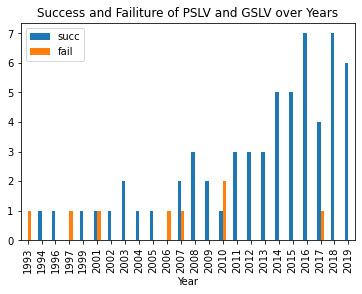

In [370]:
df_com=pd.concat([df_succ,df_fail], axis=1, sort=True)
df_com.fillna(0,inplace=True)
df_com.plot(kind='bar',title="Success and Failiture of PSLV and GSLV over Years")

 - success rate of launches conducted by ISRO for GSLV and PSLV spaceships are more 2011 to 2019.